In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('crop_recommendation.csv')

In [3]:
data.head(5) 

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
data.shape

(2200, 8)

In [6]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
data.info

<bound method DataFrame.info of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [10]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [12]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [13]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [14]:
crop_summary=pd.pivot_table(data,index=['label'],aggfunc='mean')

In [15]:
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [16]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

Visual Analysis

In [17]:
import plotly.express as px

Boxplot

In [18]:
#checking and treating outliers in each column

fig =px.box(data,y='N',points='all',title="Boxplot of N")
fig.show()

In [19]:
fig= px.box(data, y="P",points="all",title="Boxplot of P")
# sns.boxplot(data["P"])
# plt.xticks(rotation=90)
fig.show()

In [20]:
fig= px.box(data, y="K",points="all",title="Boxplot of K")
fig.show()

In [21]:
fig= px.box(data, y="temperature",points="all",title="Boxplot of temperature")
fig.show()

In [22]:
fig= px.box(data, y="humidity",points="all",title="Boxplot of humidity")
fig.show()

#boxplot of humidity means that the humidity is between 0.5 and 0.7 for most of the time 
#and there are some outliers which are above 0.7 and below 0.5 which are very few in number

In [23]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [24]:
fig= px.box(data, y="ph",points="all",title="Boxplot of ph")
fig.show()

#boxplot of ph means that the ph of the water is between 6.5 and 8.5 and the median is 7.5 and 
# the outliers are 0 and 14 which are not possible values for ph of water  

In [25]:
fig= px.box(data, y="rainfall",points="all",title="Boxplot of rainfall")
fig.show()

Outliners is used because of the following reasons:
1. To detect the frauds in the dataset.
2. To detect the outliers in the dataset.
3. To detect the extreme values in the dataset.
Outiners means the values which are far away from the mean of the dataset.
Outliners can be detected by using the boxplot.
Outliners can be removed by using the IQR method.
Outliners can be removed by using the z-score method.
Outliners can be removed by using the standard deviation method.
Outliners can be removed by using the scatter plot method.
Outliners can be removed by using the histogram method.
Outliners can be removed by using the percentile method.
Outliners can be removed by using the quantile method.
Outliners can be removed by using the log method.
Outliners can be removed by using the square root method.

IQR means Inter Quartile Range.
IQR = Q3 - Q1
Q1 = 25%
Q2 = 50%
Q3 = 75%
Q4 = 100%

Z-Score means the standard score.
Z-Score = (x - mean)/standard deviation
Z-Score = (x - mean)/sigma

Standard Deviation means the square root of the variance.
Standard Deviation = sqrt(variance)
Standard Deviation = sqrt(sigma)

Scatter Plot means the plot between the two variables.
Scatter Plot means the plot between the two columns.    

Histogram means the plot between the frequency and the variable.
Histogram means the plot between the frequency and the column.

Percentile means the percentage of the values.
Percentile means the percentage of the columns.



In [26]:
#you can detect outliners and remove them

df_boston = data
df_boston.columns = df_boston.columns
df_boston.head()

'''Detection of Outliers'''
#IQR = Q3 - Q1
Q1=np.percentile(df_boston['rainfall'],25,interpolation='midpoint') # type: ignore
Q3=np.percentile(df_boston['rainfall'],75,interpolation='midpoint') # type: ignore
IQR=Q3-Q1

print("Old Shape: ", df_boston.shape)

# Upper bound
upper = np.where(df_boston['rainfall'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(df_boston['rainfall'] <= (Q1-1.5*IQR))

'''Removing the Outliers'''
df_boston.drop(upper[0], inplace=True)
df_boston.drop(lower[0], inplace=True)


print("New Shape: ", df_boston.shape)

Old Shape:  (2200, 8)
New Shape:  (2101, 8)


In [27]:
data=df_boston

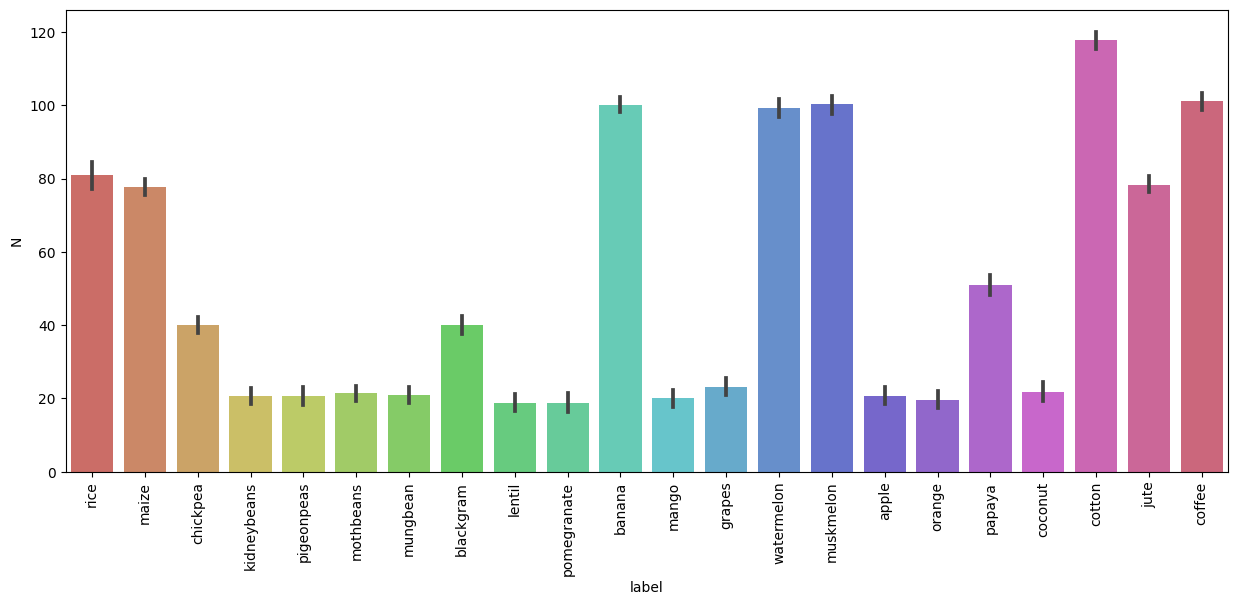

In [28]:
plt.figure(figsize=(15,6))
sns.barplot(y='N',x='label',data=data,palette='hls')
plt.xticks(rotation=90)
plt.show()

#this barplot shows that the nitrogen content is highest in cotton and lowest in kidneybeans

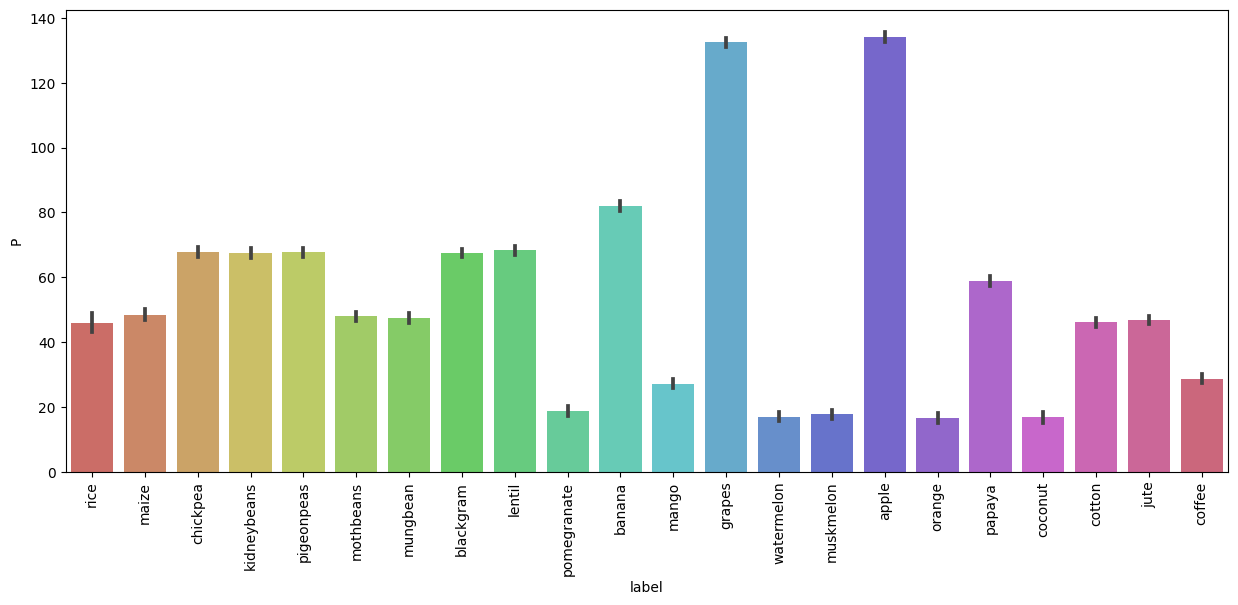

In [29]:
plt.figure(figsize=(15,6))
sns.barplot(y='P',x='label',data=data,palette='hls')
plt.xticks(rotation=90)
plt.show()

#this barplot shows that the phosphorous content is highest in grapes and lowest in kidneybeans

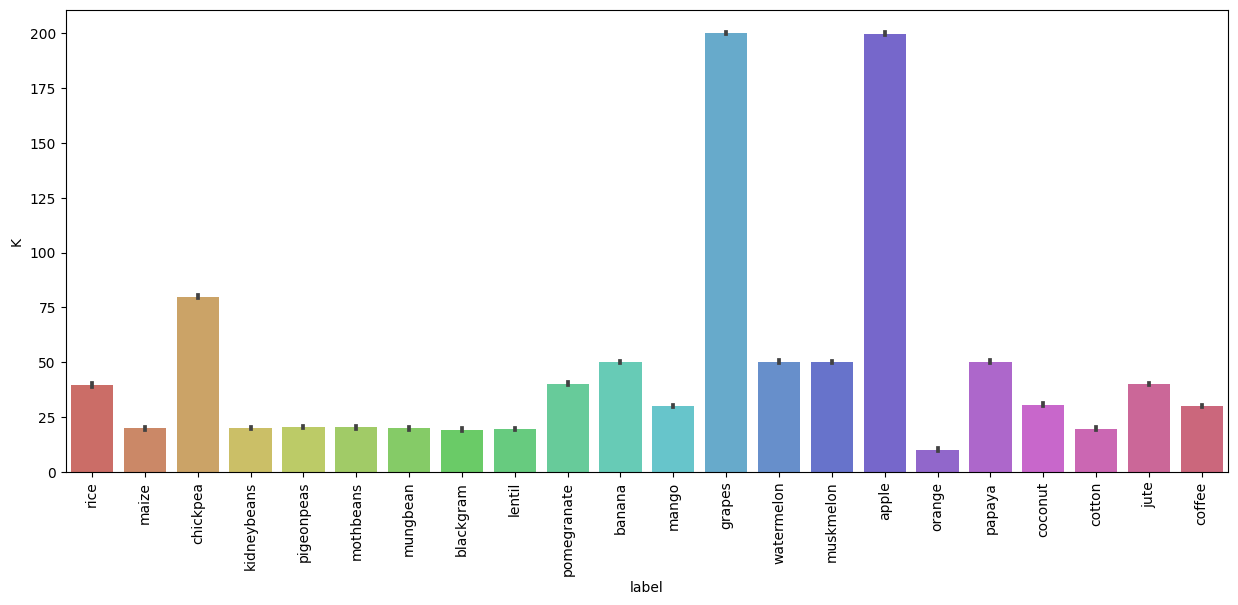

In [30]:
plt.figure(figsize=(15,6))
sns.barplot(y='K',x='label',data=data,palette='hls')
plt.xticks(rotation=90)
plt.show()

#this barplot shows that the potassium content is highest in grapes and lowest in kidneybeans.

In [31]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
crop_summary_new=data.copy()

#we used a variable crop_summary_new to store the data of crop_summary and then we used the variable crop_summary_new to plot the graph
#because if we use crop_summary to plot the graph then the graph will be plotted in the order of the index of crop_summary which is label
#and the order of the index of crop_summary is alphabetical order and we want the graph to be plotted in the order of the yield of the crops
#so we used crop_summary_new to plot the graph


In [33]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [34]:
fig1=px.bar(crop_summary_new,x='label',y='N')
fig1.show()

#this shows that the nitrogen content is highest in cotton and lowest in rice and maize.

In [35]:
fig1=px.bar(crop_summary_new,x='label',y='K')
fig1.show()

#this shows that the crop which requires more nitrogen also requires more potassium

In [36]:
fig1=px.bar(crop_summary_new,x='label',y='P')
fig1.show()

#this shows that the crops which require more nitrogen also require more phosphorous and potassium 

Correlation

In [37]:
import random
from IPython.core.display import update_display

In [38]:
data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.237127,-0.139970,0.041633,0.189609,0.099238,0.003231
P,-0.237127,1.000000,0.737806,-0.133415,-0.111730,-0.146018,-0.046656
K,-0.139970,0.737806,1.000000,-0.165188,0.198119,-0.174559,-0.042466
temperature,0.041633,-0.133415,-0.165188,1.000000,0.203789,-0.021339,-0.039570
humidity,0.189609,-0.111730,0.198119,0.203789,1.000000,-0.005955,0.020846
ph,0.099238,-0.146018,-0.174559,-0.021339,-0.005955,1.000000,-0.127166
rainfall,0.003231,-0.046656,-0.042466,-0.039570,0.020846,-0.127166,1.000000


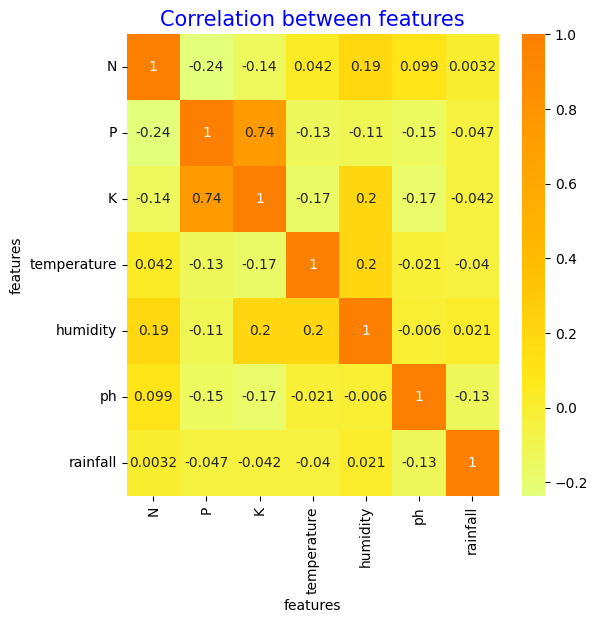

In [39]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
sns.heatmap(data.corr(),annot=True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between features',fontsize=15,c='blue')
plt.show()

In [40]:
X=data.drop('label',axis=1)
y=data['label']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,shuffle=True,random_state=0)

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [43]:
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [44]:
y_pred_decisiontree=Classifier.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred_decisiontree)
print('decision tree model accuracy score: {0:0.4f}'.format(accuracy_score(y_test,y_pred_decisiontree)))

decision tree model accuracy score: 0.9905


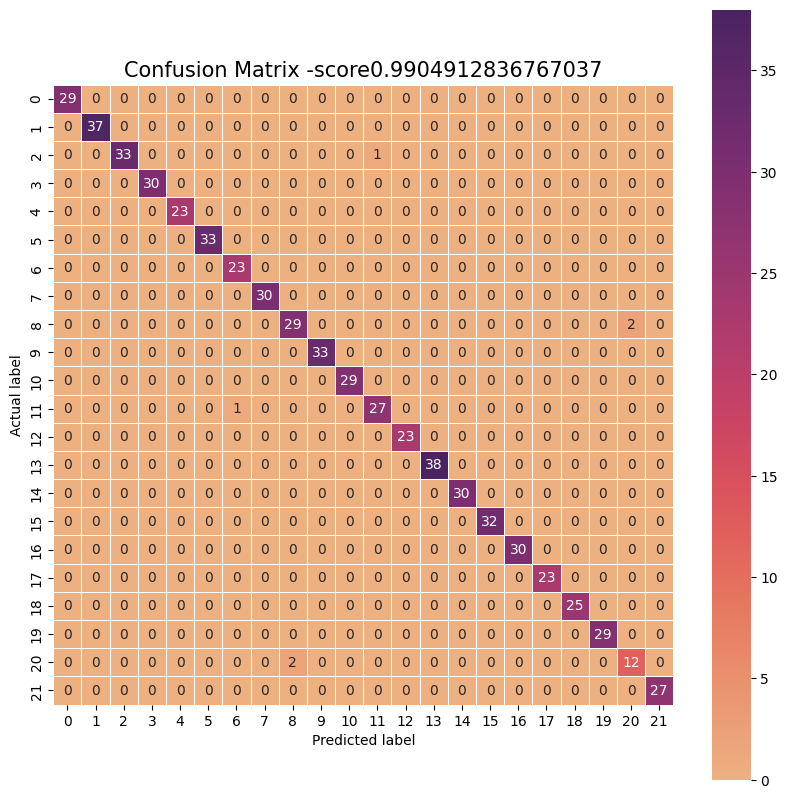

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_decisiontree)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'flare');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='Confusion Matrix -score'+str(accuracy_score(y_test, y_pred_decisiontree))
plt.title(all_sample_title, size = 15);
plt.show()

In [47]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_decisiontree))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        37
   blackgram       1.00      0.97      0.99        34
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        33
      cotton       0.96      1.00      0.98        23
      grapes       1.00      1.00      1.00        30
        jute       0.94      0.94      0.94        31
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      1.00      1.00        29
       maize       0.96      0.96      0.96        28
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      1.00      1.00        38
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        32
      orange       1.00      1.00      1.00        30
      papaya       1.00    

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
classifier_lr = LogisticRegression(random_state = 0)

In [50]:
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [51]:
y_pred_lr=classifier_lr.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_pred_lr)
print('Logistic Regression Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_lr)))

Logistic Regression Model accuracy score: 0.9445


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        37
   blackgram       0.87      0.79      0.83        34
    chickpea       1.00      1.00      1.00        30
     coconut       0.92      1.00      0.96        23
      coffee       1.00      1.00      1.00        33
      cotton       0.78      0.91      0.84        23
      grapes       1.00      1.00      1.00        30
        jute       0.81      0.94      0.87        31
 kidneybeans       1.00      1.00      1.00        33
      lentil       0.88      1.00      0.94        29
       maize       0.81      0.79      0.80        28
       mango       1.00      1.00      1.00        23
   mothbeans       0.91      0.76      0.83        38
    mungbean       0.97      1.00      0.98        30
   muskmelon       1.00      1.00      1.00        32
      orange       1.00      1.00      1.00        30
      papaya       0.95    

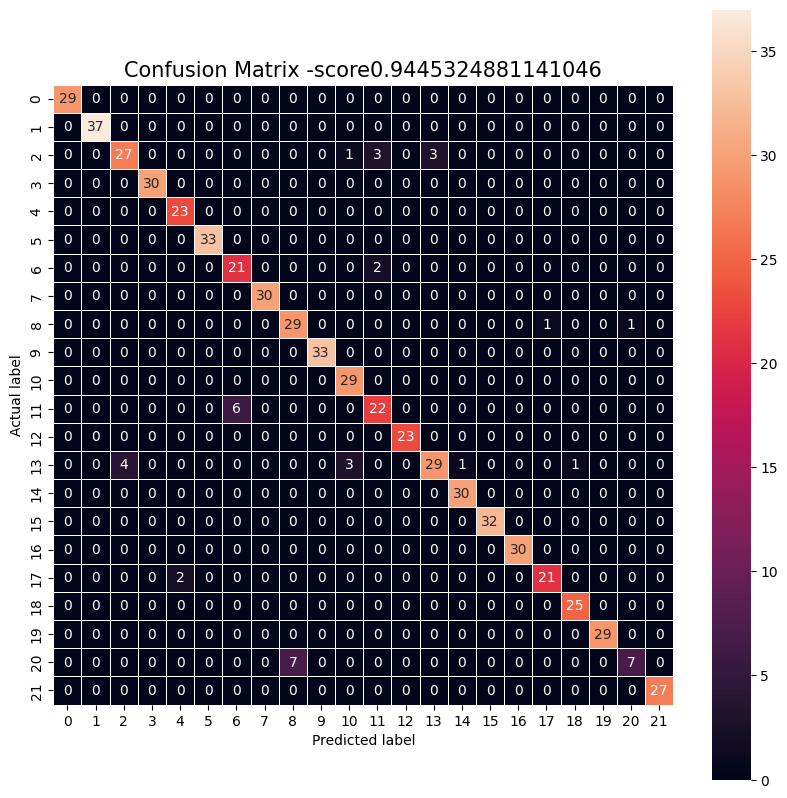

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'rocket');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='Confusion Matrix -score'+str(accuracy_score(y_test, y_pred_lr))
plt.title(all_sample_title, size = 15);
plt.show()

Random Forest Model accuracy score: 0.9857
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        37
   blackgram       1.00      0.97      0.99        34
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        33
      cotton       0.96      1.00      0.98        23
      grapes       1.00      1.00      1.00        30
        jute       0.82      1.00      0.90        31
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      1.00      1.00        29
       maize       0.96      0.96      0.96        28
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      1.00      1.00        38
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        32
      orange       1.00      1.00     

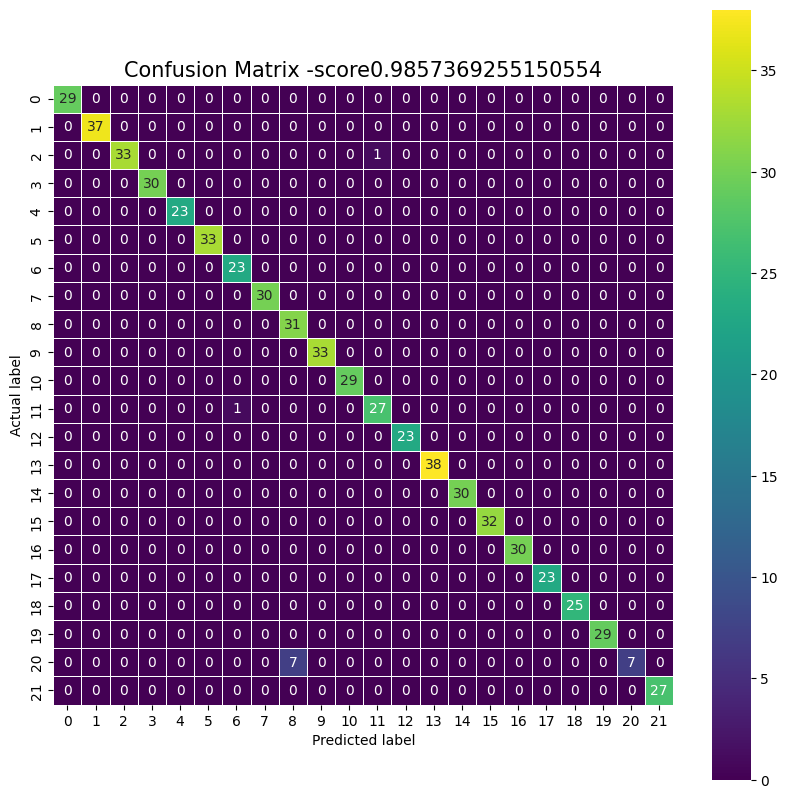

In [61]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

y_pred_rf=classifier_rf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_pred_rf)
print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rf)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='Confusion Matrix -score'+str(accuracy_score(y_test, y_pred_rf))
plt.title(all_sample_title, size = 15);
plt.show()

SVM Model accuracy score: 0.9842
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        37
   blackgram       1.00      1.00      1.00        34
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        23
      coffee       1.00      0.97      0.98        33
      cotton       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        30
        jute       0.81      0.94      0.87        31
 kidneybeans       1.00      1.00      1.00        33
      lentil       0.97      1.00      0.98        29
       maize       1.00      1.00      1.00        28
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      0.97      0.99        38
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        32
      orange       1.00      1.00      1.00     

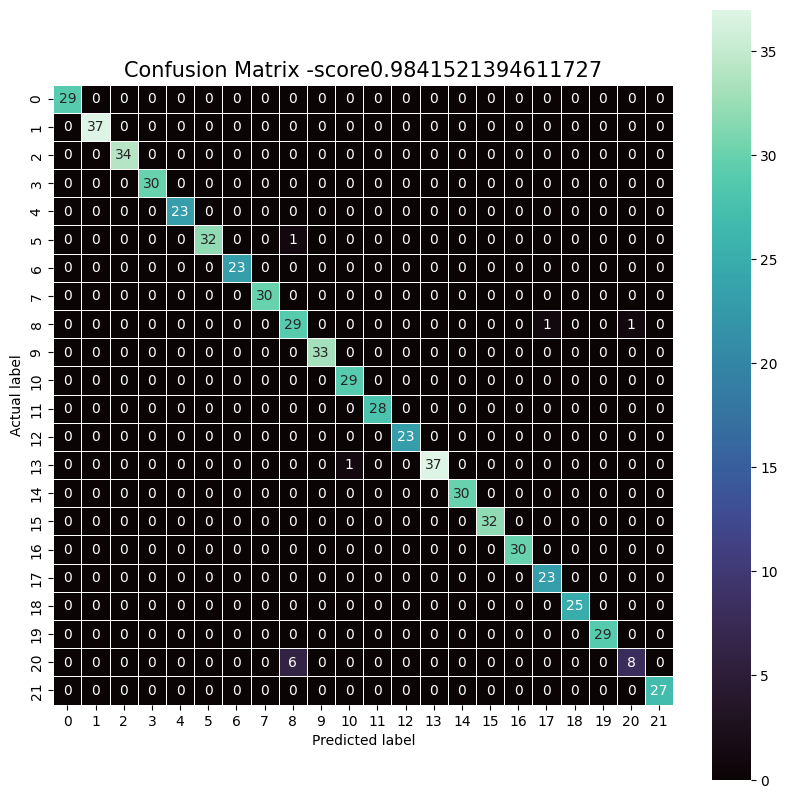

In [62]:
#svm model
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'linear', random_state = 0)
classifier_svm.fit(X_train, y_train)

y_pred_svm=classifier_svm.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_pred_svm)
print('SVM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_svm)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'mako');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='Confusion Matrix -score'+str(accuracy_score(y_test, y_pred_svm))
plt.title(all_sample_title, size = 15);
plt.show()


In [55]:
#now design a hybrid model using LR and decision tree classifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

# Create sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

# Create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
y_pred_hybrid = ensemble.predict(X_test)
print("Accuracy score of ensemble model is:",accuracy_score(y_test, y_pred_hybrid))

Accuracy score of ensemble model is: 0.9587955625990491


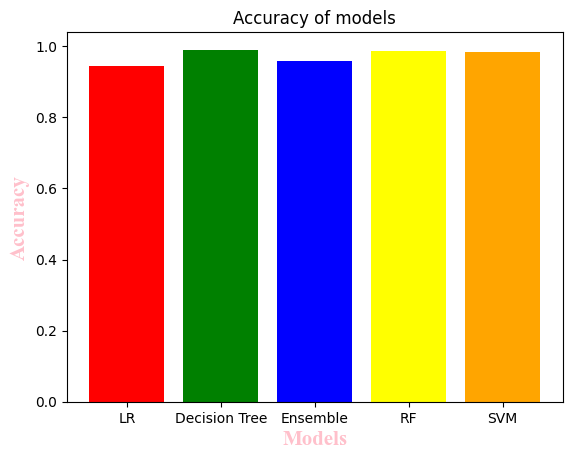

In [78]:
#now design bar plot for accuracy score of models used above
models = ['LR', 'Decision Tree', 'Ensemble','RF','SVM']
accuracy = [accuracy_score(y_test, y_pred_lr),accuracy_score(y_test, y_pred_decisiontree),accuracy_score(y_test, y_pred_hybrid),accuracy_score(y_test, y_pred_rf),accuracy_score(y_test, y_pred_svm)]

#make different color for each model
colors = ['red', 'green', 'blue', 'yellow','orange']
plt.bar(models,accuracy,color=colors)
plt.xlabel('Models',color='pink',fontsize=15,fontweight='bold',horizontalalignment='center',fontname='Times New Roman')
plt.ylabel('Accuracy',color='pink',fontsize=15,fontweight='bold',horizontalalignment='center',fontname='Times New Roman')
plt.title('Accuracy of models')
plt.show()

In [57]:
X_test[0:1]

,N,P,K,temperature,humidity,ph,rainfall
1203,36,125,196,37.465668,80.659687,6.155261,66.838723


In [58]:
result=Classifier.predict(X_test[0:1])

In [59]:
result

array(['grapes'], dtype=object)

In [60]:
y_test[0:1]

1203    grapes
Name: label, dtype: object